In [1]:
from shapely.geometry import Point
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import folium
from folium.plugins import MarkerCluster
from folium.plugins import FastMarkerCluster
import requests
import geojson
import json


%matplotlib inline

In [2]:
with open('../data/WeGo.json') as fi:
    credentials = json.load(fi)

In [3]:
Authorization = credentials['Authorization']

In [4]:
Authorization


'5f2680b713bddbda2b2a03bf89fa4751'

In [5]:
URL = 'https://api.goswift.ly/speed-map/nashville/route/56'
params_AprilMay_MandF_AMPeak = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
}
params_geo_AprilMay_MandF_AMPeak  = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
}
params_May_AMPeak = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'daysOfWeek': '1,2,3,4,5',
    'resolution': 'hiRes',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'excludeDates' : '05-30-2022',
}
params_geo_May_AMPeak  = {
    'direction': '1',
    'startDate': '03-25-2022',
    'endDate': '04-24-2022',
    'format'   : 'geojson',
    'daysOfWeek': '1,2,3,4,5',
    'beginTime' : '06:00',
    'endTime' : '09:00',
    'resolution': 'hiRes',
    'excludeDates' : '05-30-2022',
    
}
headers = {'Authorization': Authorization,
         'Content-Type': 'application/json'}

In [6]:
AprilMay_MandF_AMPeak = requests.get(URL, params = params_AprilMay_MandF_AMPeak, headers = headers)

In [7]:
response_AprilMay_MandF_AMPeak = AprilMay_MandF_AMPeak.json()


In [8]:
response_AprilMay_MandF_AMPeak = AprilMay_MandF_AMPeak.json()['data']['segments']

In [9]:
route56_AprilMay_MandF_AMPeak_df = pd.DataFrame(response_AprilMay_MandF_AMPeak)


In [10]:
route56_AprilMay_MandF_AMPeak_df = route56_AprilMay_MandF_AMPeak_df[['countForSegment','percent20Secs']]
route56_AprilMay_MandF_AMPeak_df.head(5)

,countForSegment,percent20Secs
0,370,1.474
1,374,1.652
2,365,1.693
3,198,1.888
4,266,2.186


In [11]:
geo_AprilMay_MandF_AMPeak = requests.get(URL, params = params_geo_AprilMay_MandF_AMPeak, headers = headers)

In [12]:
geo_response_AprilMay_MandF_AMPeak = geo_AprilMay_MandF_AMPeak.json()['features']


In [13]:
geo_route56_AprilMay_MandF_AMPeak_df = gpd.GeoDataFrame.from_features(geo_response_AprilMay_MandF_AMPeak)


In [14]:
full_geo_route56_AprilMay_MandF_AMPeak_df = pd.concat([geo_route56_AprilMay_MandF_AMPeak_df, route56_AprilMay_MandF_AMPeak_df], axis=1)


In [15]:
full_geo_route56_AprilMay_MandF_AMPeak_df['time_of_day']='6am - 9am AM Peak'
full_geo_route56_AprilMay_MandF_AMPeak_df['start_date']= '03-25-2022'
full_geo_route56_AprilMay_MandF_AMPeak_df['end_date']= '04-24-2022'
full_geo_route56_AprilMay_MandF_AMPeak_df['direction']= 'Inbound'
full_geo_route56_AprilMay_MandF_AMPeak_df['days']= 'Mon_Fri'
full_geo_route56_AprilMay_MandF_AMPeak_df.head(2)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.997311,11.734277,6.391,3.013,...,1.568,1.378,0.894,370,1.474,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,"LINESTRING (-86.71756 36.25213, -86.71770 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.651,2.863463,8.608807,17.367,5.200,...,1.757,1.551,1.340,374,1.652,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [16]:
full_geo_route56_AprilMay_MandF_AMPeak_df.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000,752.000000
mean,24.361031,3.327470,10.644092,34.917283,5.866739,4.005347,3.167258,2.328311,1.925628,1.590656,1.124705,360.184840,1.770096
std,0.437212,5.157085,4.091155,67.832575,11.597258,8.259356,6.319802,3.609202,2.165550,1.036118,0.329518,48.184196,1.629938
min,22.655000,1.363474,0.248762,2.657000,1.637000,1.504000,1.436000,1.339000,1.235000,1.110000,0.361000,78.000000,1.181000
25%,23.971000,1.767927,8.220407,5.361000,2.177000,1.940500,1.795000,1.612000,1.478000,1.311750,1.005000,366.000000,1.405750
50%,24.524000,2.206438,10.908072,12.253000,3.072500,2.438000,2.152500,1.832500,1.663500,1.464500,1.096000,371.000000,1.576000
75%,24.685000,2.955332,13.816449,35.227000,4.862500,3.505000,2.850500,2.155000,1.857500,1.621000,1.252000,376.000000,1.739000
max,24.913000,95.697744,18.041415,547.338000,217.129000,175.459000,136.685000,68.802000,43.544000,24.926000,3.197000,389.000000,34.658000


In [17]:
full_geo_route56_AprilMay_MandF_AMPeak_df.countForSegment.value_counts().head(2)

371    66
366    60
Name: countForSegment, dtype: int64

In [18]:
full_geo_route56_AprilMay_MandF_AMPeak_df.head()

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.997311,11.734277,6.391,3.013,...,1.568,1.378,0.894,370,1.474,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,"LINESTRING (-86.71756 36.25213, -86.71770 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.651,2.863463,8.608807,17.367,5.200,...,1.757,1.551,1.340,374,1.652,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.172581,11.023294,5.262,3.165,...,1.774,1.562,0.819,365,1.693,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.648823,6.782461,8.939,6.035,...,2.503,1.608,0.361,198,1.888,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.719974,6.418862,43.447,5.522,...,2.416,1.925,1.308,266,2.186,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [19]:
full_geo_route56_AprilMay_MandF_AMPeak_df['countForSegment'].max()/2

194.5

In [20]:
x_geo_route56_AprilMay_MandF_AMPeak_df=full_geo_route56_AprilMay_MandF_AMPeak_df[full_geo_route56_AprilMay_MandF_AMPeak_df['countForSegment'] > full_geo_route56_AprilMay_MandF_AMPeak_df['countForSegment'].max()/2]
x_geo_route56_AprilMay_MandF_AMPeak_df

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,"LINESTRING (-86.70083 36.29509, -86.70098 36.2...",GXIMYASF,Myatt Station Inbound,GALALLSN,N Gallatin Pk & Alta Loma Rd Sb,23.437,1.997311,11.734277,6.391,3.013,...,1.568,1.378,0.894,370,1.474,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,"LINESTRING (-86.71756 36.25213, -86.71770 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.651,2.863463,8.608807,17.367,5.200,...,1.757,1.551,1.340,374,1.652,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
2,"LINESTRING (-86.73946 36.20187, -86.73957 36.2...",GXIEHILF,East Hill Station Inbound,GALBURSN,Gallatin Pk & Burchwood Av,23.949,2.172581,11.023294,5.262,3.165,...,1.774,1.562,0.819,365,1.693,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.648823,6.782461,8.939,6.035,...,2.503,1.608,0.361,198,1.888,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.719974,6.418862,43.447,5.522,...,2.416,1.925,1.308,266,2.186,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
747,"LINESTRING (-86.72859 36.21751, -86.72870 36.2...",GALCURSN,Gallatin Pike & Curdwood Blvd Sb,GALGILSF,Gallatin Pike & Gilock St Sb,24.257,1.592301,15.233929,2.893,1.846,...,1.483,1.299,1.086,365,1.406,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
748,"LINESTRING (-86.74117 36.19872, -86.74128 36.1...",GALBURSN,Gallatin Pk & Burchwood Av,GALCARSN,Gallatin Pk & Carolyn Ave Sb,23.951,1.874334,12.778406,5.536,2.255,...,1.694,1.517,0.819,368,1.618,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
749,"LINESTRING (-86.72369 36.23978, -86.72373 36.2...",GALBERWF,S Gallatin Pike & Berkley Dr Sb,GXIWALTF,Walton Station Inbound,24.773,1.997476,12.402152,17.053,2.927,...,1.477,1.319,1.095,376,1.406,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
750,"LINESTRING (-86.78119 36.16721, -86.78115 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,5.546709,4.304895,92.946,7.281,...,4.246,3.389,2.537,251,3.861,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [21]:
x_geo_route56_AprilMay_MandF_AMPeak_df.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,24.356314,3.202463,10.804731,32.840799,5.663169,3.891703,3.083173,2.259229,1.866658,1.549921,1.098937,366.856753,1.719000
std,0.441853,5.042934,4.002619,63.978167,11.533867,8.265689,6.306181,3.545060,2.062722,0.964953,0.277089,24.815988,1.537913
min,22.655000,1.363474,0.248762,2.657000,1.637000,1.504000,1.436000,1.339000,1.235000,1.110000,0.361000,198.000000,1.181000
25%,23.971000,1.760361,8.470781,5.262000,2.166000,1.933000,1.791000,1.610000,1.476000,1.310000,1.005000,366.000000,1.404000
50%,24.524000,2.181992,11.094243,11.796000,3.031000,2.414000,2.118000,1.826000,1.652000,1.459000,1.086000,371.000000,1.557000
75%,24.685000,2.880363,13.882666,33.172000,4.677000,3.381000,2.749000,2.109500,1.843000,1.597000,1.222000,376.000000,1.729000
max,24.913000,95.697744,18.041415,547.338000,217.129000,175.459000,136.685000,68.802000,43.544000,24.926000,2.537000,389.000000,34.658000


import numpy as np
a = np.array([1,2,3,4,5])
p = np.percentile(a, 50) # return 50th percentile, e.g median.
print p
3.0

In [22]:
import numpy as np

In [23]:
p_20 = np.percentile(x_geo_route56_AprilMay_MandF_AMPeak_df['percent20Secs'], 80)
p_20

1.7758

In [24]:
x_geo_route56_AprilMay_MandF_AMPeak_df.head()['percent20Secs']<=p_20

0     True
1     True
2     True
3    False
4    False
Name: percent20Secs, dtype: bool

In [29]:
filtered_geo_route56_AprilMay_MandF_AMPeak_df=x_geo_route56_AprilMay_MandF_AMPeak_df[x_geo_route56_AprilMay_MandF_AMPeak_df['percent20Secs']>=np.percentile(x_geo_route56_AprilMay_MandF_AMPeak_df['percent20Secs'], 80)]
filtered_geo_route56_AprilMay_MandF_AMPeak_df

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.648823,6.782461,8.939,6.035,...,2.503,1.608,0.361,198,1.888,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.719974,6.418862,43.447,5.522,...,2.416,1.925,1.308,266,2.186,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
11,"LINESTRING (-86.76518 36.17294, -86.76543 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,5.977893,4.157987,70.026,11.561,...,2.550,1.962,1.388,374,2.230,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
18,"LINESTRING (-86.71265 36.26109, -86.71273 36.2...",GALMAPSN,Gallatin Pike S & Maple St Sb,GXIMADLB,Madison Station Inbound,23.836,3.475779,6.857743,78.906,6.577,...,2.019,1.640,0.981,362,1.820,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
25,"LINESTRING (-86.69603 36.30018, -86.69624 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.521894,7.026901,18.549,5.275,...,2.503,1.608,0.361,198,1.888,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
730,"LINESTRING (-86.74424 36.19297, -86.74434 36.1...",GALCARSN,Gallatin Pk & Carolyn Ave Sb,GXIDOUGN,Douglas Station Inbound,23.971,18.056030,1.327590,176.474,48.985,...,2.526,1.794,1.276,362,1.991,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
731,"LINESTRING (-86.71994 36.24864, -86.72007 36.2...",GXIDUESN,Due West Station Inbound,GALBERWF,S Gallatin Pike & Berkley Dr Sb,23.544,6.958982,3.383253,49.032,13.029,...,3.239,2.144,1.544,380,2.553,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
740,"LINESTRING (-86.76493 36.17303, -86.76518 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,18.250698,1.361921,107.036,52.037,...,2.896,2.011,1.388,374,2.276,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
741,"LINESTRING (-86.71969 36.24903, -86.71982 36.2...",GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,GXIDUESN,Due West Station Inbound,24.651,6.156979,4.003749,52.686,11.938,...,3.202,2.145,1.616,377,2.709,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [30]:
filtered_geo_route56_AprilMay_MandF_AMPeak_df.sort_values(by=('percent20Secs'), ascending=False)

,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
365,"LINESTRING (-86.78159 36.16633, -86.78182 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,73.004303,0.327077,547.338,113.843,...,43.544,24.926,2.401,211,34.658,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
319,"LINESTRING (-86.71397 36.25739, -86.71404 36.2...",GXIMADLB,Madison Station Inbound,GALEMMSN,S Gallatin Pike & Emmitt Ave Sb,23.806,95.697744,0.248762,400.669,217.129,...,32.958,6.877,1.581,363,20.486,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
379,"LINESTRING (-86.78135 36.16642, -86.78159 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,20.117310,1.186938,275.631,26.980,...,15.876,6.777,2.401,216,14.494,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
456,"LINESTRING (-86.78111 36.16652, -86.78135 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,12.066226,1.978912,275.631,16.967,...,8.215,5.121,2.401,221,6.730,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
697,"LINESTRING (-86.78103 36.16682, -86.78091 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,8.752030,2.728281,275.631,10.709,...,5.506,4.257,2.401,232,4.974,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
556,"LINESTRING (-86.74982 36.18045, -86.74991 36.1...",GXIEASTN,Eastland Station Inbound,GXIFIVEN,Five Points Station Inbound,23.743,3.085305,7.695511,14.921,5.033,...,1.949,1.666,1.358,371,1.793,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
367,"LINESTRING (-86.73776 36.20483, -86.73789 36.2...",GALMAYSN,Gallatin Pike & Maynor Ave Sb,GXIEHILF,East Hill Station Inbound,24.476,2.828410,8.653625,33.232,4.432,...,1.879,1.631,1.220,366,1.793,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
342,"LINESTRING (-86.77738 36.16821, -86.77762 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,4.419210,5.624535,71.596,7.923,...,1.955,1.574,1.185,377,1.783,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
255,"LINESTRING (-86.74515 36.19119, -86.74524 36.1...",GXIDOUGN,Douglas Station Inbound,GALGRESF,Gallatin Ave & Greenwood Ave Sb,23.880,2.357727,10.128399,30.438,2.690,...,1.841,1.653,1.332,362,1.780,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


In [31]:
filtered_geo_route56_AprilMay_MandF_AMPeak_df.describe()

,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,percent90Secs,percent80Secs,percent70Secs,medianSecs,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs
count,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000,147.000000
mean,24.176741,6.459974,6.045030,73.975027,12.798762,8.462027,6.384122,4.141616,3.007163,2.150646,1.348680,348.326531,2.598483
std,0.408980,10.089124,2.679352,100.311706,22.446156,16.978202,13.277955,7.616266,4.424472,2.035205,0.368019,48.265130,3.285070
min,23.544000,2.270662,0.248762,6.098000,2.549000,2.333000,2.175000,2.014500,1.841000,1.574000,0.361000,198.000000,1.777000
25%,23.878000,2.938306,3.733728,16.862500,4.400500,3.422000,2.929000,2.418250,2.015500,1.707500,1.220000,363.000000,1.872000
50%,24.039000,3.705620,6.546896,42.110000,5.900000,4.203000,3.508000,2.674000,2.203000,1.787000,1.308000,367.000000,1.981000
75%,24.565000,6.456129,8.299259,70.638000,11.331000,7.053500,5.276500,3.366000,2.503500,1.952000,1.403000,371.000000,2.191000
max,24.856000,95.697744,10.456422,547.338000,217.129000,175.459000,136.685000,68.802000,43.544000,24.926000,2.537000,387.000000,34.658000


In [33]:
filtered_geo_route56_AprilMay_MandF_AMPeak_df.reset_index().head()

,index,geometry,fromStopId,fromStopName,toStopId,toStopName,pathLengthMeters,averageTravelSeconds,averageTravelSpeed,maxSecs,...,percent30Secs,percent10Secs,minSecs,countForSegment,percent20Secs,time_of_day,start_date,end_date,direction,days
0,3,"LINESTRING (-86.69581 36.30031, -86.69603 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.648823,6.782461,8.939,...,2.503,1.608,0.361,198,1.888,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
1,4,"LINESTRING (-86.77859 36.16773, -86.77882 36.1...",JAMGAYWF,James Robertson Pkwy & Gay St Wb,MCC4_18,Central 4th Ave - Bay 18,23.878,3.719974,6.418862,43.447,...,2.416,1.925,1.308,266,2.186,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
2,11,"LINESTRING (-86.76518 36.17294, -86.76543 36.1...",MAI5STWN,Main St & 5th St Wb,JAMGAYWF,James Robertson Pkwy & Gay St Wb,24.856,5.977893,4.157987,70.026,...,2.550,1.962,1.388,374,2.230,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
3,18,"LINESTRING (-86.71265 36.26109, -86.71273 36.2...",GALMAPSN,Gallatin Pike S & Maple St Sb,GXIMADLB,Madison Station Inbound,23.836,3.475779,6.857743,78.906,...,2.019,1.640,0.981,362,1.820,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri
4,25,"LINESTRING (-86.69603 36.30018, -86.69624 36.3...",GXIRIVEF,Rivergate Station,GXIMYASF,Myatt Station Inbound,24.748,3.521894,7.026901,18.549,...,2.503,1.608,0.361,198,1.888,6am - 9am AM Peak,03-25-2022,04-24-2022,Inbound,Mon_Fri


<AxesSubplot:>

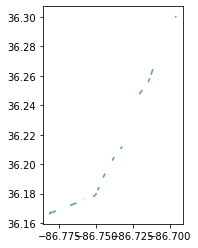

In [34]:
filtered_geo_route56_AprilMay_MandF_AMPeak_df.plot()

In [37]:
import json

def read_ipynb('notebook/May_route_56_kh_FINAL'):
    with open(('notebook/APR_route_56_kh_FINAL'):, 'r', encoding='utf-8') as f:
        return json.load(f)

SyntaxError: invalid syntax (1960167925.py, line 3)